# CS350 Homework 5 EVAL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def get_req_ls(name, i, j, k=1):
    req_ls = []
    for index in range(i, j+1, k):
        path = name + (str(index) + ".txt")
        request_ls = []
        with open(path, 'r') as file:
            for line in file:     
                if line[0] == 'T':
                    # print(line)
                    ls = line.strip().split(' ')[1].split(':')[1].split(',')
                    request_ls.append(ls) 
        req_ls.append(request_ls)
    return req_ls

def compute_runtime(req_ls):
    summ = 0
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        j = len(request_ls)-1
        total_time = (float)(request_ls[j][4]) - (float)(request_ls[0][0])
        summ+= total_time
    return summ / len(req_ls)

def compute_avg_resp(req_ls):
    res = []
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        sum_resp = 0
        num_resp = len(request_ls)
        avg_resp = 0
        for j in range(len(request_ls)):
            sum_resp += (float)(request_ls[j][4]) - (float)(request_ls[j][0])
        avg_resp = sum_resp / num_resp
        res.append(avg_resp)
    return res

def compute_utilization(req_ls):
    util_ls = []
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        total_t = (float)(request_ls[-1][-1]) - (float)(request_ls[0][-2])
        busy_t = 0
        for j in range(len(request_ls)):
            busy_t += (float)(request_ls[j][4]) - (float)(request_ls[j][3])
        utilization = busy_t / total_t
        util_ls.append(utilization)
    return util_ls

### a)

In [3]:
print('param -a\tpolicy\t runtime(s)')
print('-'*45)
path_fifo_10 = './data/a/s_fifo_10_'
fifo_10_ls =get_req_ls(path_fifo_10, 1, 10)
path_fifo_10_runtime = compute_runtime(fifo_10_ls)
print(f'10\t\tFIFO\t {path_fifo_10_runtime}')

path_sjn_10 = './data/a/s_sjn_10_'
sjn_10_ls =get_req_ls(path_sjn_10, 1, 10)
path_sjn_10_runtime = compute_runtime(sjn_10_ls)
print(f'10\t\tSJN\t {path_sjn_10_runtime}')

print('-'*45)

path_fifo_40 = './data/a/s_fifo_40_'
fifo_40_ls =get_req_ls(path_fifo_40, 1, 10)
path_fifo_40_runtime = compute_runtime(fifo_40_ls)
print(f'40\t\tFIFO\t {path_fifo_40_runtime}')

path_sjn_40 = './data/a/s_sjn_40_'
sjn_40_ls =get_req_ls(path_sjn_40, 1, 10)
path_sjn_40_runtime = compute_runtime(sjn_40_ls)
print(f'40\t\tSJN\t {path_sjn_40_runtime}')

param -a	policy	 runtime(s)
---------------------------------------------
10		FIFO	 150.69924389999977
10		SJN	 150.7078868000004
---------------------------------------------
40		FIFO	 37.926467200000026
40		SJN	 37.92914829999995


Under the both low and high utilization, the runtime of FIFO queue and SJN queue is really close.

In regards to the extra per-request time, for FIFO queue, the extra time is negligible, as tasks are simply processed in the order they arrive by dequeuing from the end of the queue straightforward. As for SJN queue, the server might need this extra per-request time to determine the length of each task and find the right place to allocate the request in queue. Thus, there is an extra time for request allocation in queue. Thus, the total runtime of SJN queue is close to that of FIFO.

### b)

param -a	FIFO utilization	FIFO response time	SJN utilization		SJN response time	 ratio SJN faster than FIFO
--------------------------------------------------------------------------------------------------------------------------------------------
22		1.0821933103090837	0.07291331133334036	1.0821901254854216	0.06691803200000443	 1.0895913874654224
24		1.1802214873992722	0.07817265266666223	1.179966851884519	0.06951667400000405	 1.1245165824052181
26		1.2782225149278275	0.08464433733333378	1.2779992534061726	0.07375120266667243	 1.1477011122909304
28		1.3761708269060688	0.09717155800000121	1.3761820287929578	0.08013529333332917	 1.2125937768245052
30		1.4736555207355884	0.112971565043375	1.4740014327629634	0.0859053099999995	 1.3150708034622731
32		1.5718922070394519	0.13500077066666988	1.5716891273328473	0.09401819199999924	 1.4359005187705691
34		1.6695137519394045	0.16483628533334893	1.6661565962686762	0.10490084656436773	 1.5713532419607739
36		1.7671072419936582	0.2174715256837847

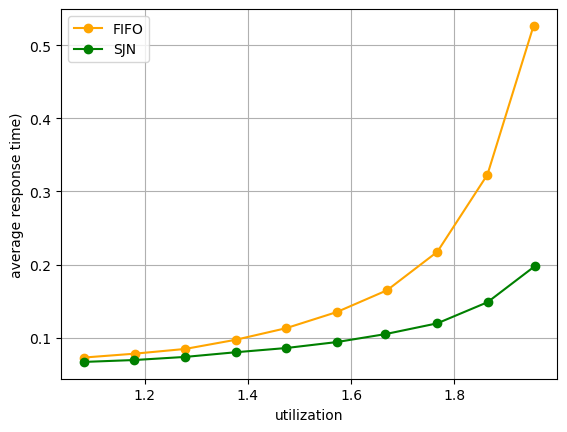

In [28]:
path_fifo = './data/b/s_fifo_'
fifo_req_ls =get_req_ls(path_fifo, 22, 40, 2)
fifo_rep_ls = compute_avg_resp(fifo_req_ls)
fifo_util_ls = compute_utilization(fifo_req_ls)

path_sjn = './data/b/s_sjn_'
sjn_req_ls =get_req_ls(path_sjn, 22, 40, 2)
sjn_rep_ls = compute_avg_resp(sjn_req_ls)
sjn_util_ls = compute_utilization(sjn_req_ls)

param_a_ls = [x for x in range(22, 41, 2)]

print(f"param -a\tFIFO utilization\tFIFO response time\tSJN utilization\t\tSJN response time\t ratio SJN faster than FIFO")
print('-'*140)
for i in range(len(param_a_ls)):
    a = param_a_ls[i]
    fifo_rep = fifo_rep_ls[i]
    fifo_util = fifo_util_ls[i]
    sjn_rep = sjn_rep_ls[i]
    sjn_util = sjn_util_ls[i]
    print(f"{a}\t\t{fifo_util}\t{fifo_rep}\t{sjn_util}\t{sjn_rep}\t {fifo_rep/sjn_rep}")


plt.plot(fifo_util_ls, fifo_rep_ls, color='orange', marker='o', label='FIFO')
plt.plot(sjn_util_ls, sjn_rep_ls, color='green', marker='o', label='SJN')
plt.xlabel('utilization')
plt.ylabel('average response time)')
plt.grid()
plt.legend()
plt.show()


SJN queuevworks better than FIFO queue. Because, when `param -a` = 40, the average response time of FIFO is 0.526 while that of SJN is 0.1968. Thus, SJN queue is about 2.66 times faster than FIFO queue.

### c)

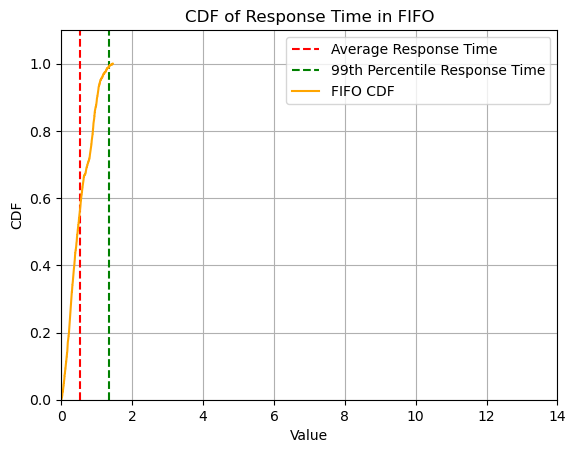

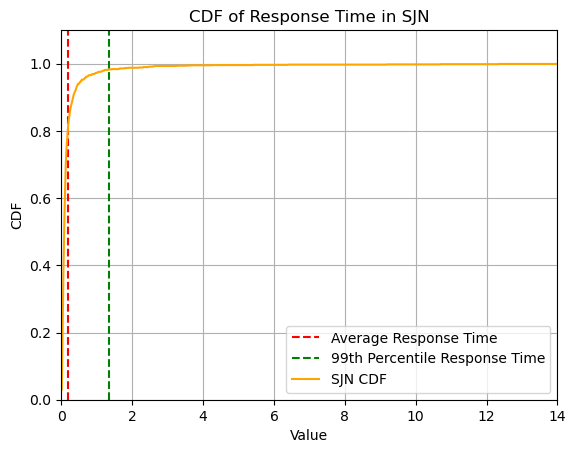

FIFO queue
Best response time: 0.0003229999997529376
Worst response time: 1.450369000000137
Predictability: 1.450046000000384

SJN queue
Best response time: 0.00032499999997526174
Worst response time: 14.200642000000244
Predictability: 14.200317000000268


In [30]:
fifo_req_ls_40 = fifo_req_ls[-1]
data_fifo = np.zeros(len(fifo_req_ls_40))
for j in range(len(fifo_req_ls_40)):
    req_t = (float)(fifo_req_ls_40[j][4]) - (float)(fifo_req_ls_40[j][0])
    data_fifo[j] = req_t

percentile_99_rep_fifo = np.percentile(data_fifo, 99)
count, bins_count = np.histogram(data_fifo, bins=len(fifo_req_ls_40)) 
pdf = count / sum(count)
cdf = np.cumsum(pdf) 
   
# plotting PDF and CDF 
plt.axvline(x=fifo_rep_ls[-1], color='r', linestyle='--', label='Average Response Time')
plt.axvline(x=percentile_99_rep_fifo, color='g', linestyle='--', label='99th Percentile Response Time')
plt.plot(bins_count[1:], cdf, label="FIFO CDF", color='orange') 
plt.legend() 
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of Response Time in FIFO')
plt.grid(True)
plt.xlim(0, 14)
plt.ylim(0,1.1)
plt.show()

sjn_req_ls_40 = sjn_req_ls[-1]
data_sjn = np.zeros(1500)
for j in range(len(sjn_req_ls_40)):
    data_sjn[j] = (float)(sjn_req_ls_40[j][4]) - (float)(sjn_req_ls_40[j][0])
percentile_99_rep_sjn = np.percentile(data_sjn, 99)
count, bins_count = np.histogram(data_sjn, bins=len(sjn_req_ls_40)) 
pdf = count / sum(count)
cdf = np.cumsum(pdf) 
# data_sjn.sort()
# print(data_sjn[-10:])


# plotting CDF  
plt.axvline(x=sjn_rep_ls[-1], color='r', linestyle='--', label='Average Response Time')
plt.axvline(x=percentile_99_rep_fifo, color='g', linestyle='--', label='99th Percentile Response Time')
plt.plot(bins_count[1:], cdf, label="SJN CDF", color='orange') 
plt.legend() 
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of Response Time in SJN')
plt.grid(True)
plt.xlim(0, 14)
plt.ylim(0,1.1)
plt.show()

print("FIFO queue")
print(f"Best response time: {data_fifo.min()}")  
print(f"Worst response time: {data_fifo.max()}")  
print(f"Predictability: {data_fifo.max()-data_fifo.min()}\n") 

print("SJN queue")
print(f"Best response time: {data_sjn.min()}")  
print(f"Worst response time: {data_sjn.max()}")  
print(f"Predictability: {data_sjn.max()-data_sjn.min()}")  

### d)

From the graphs above, the CDF of the FIFO queue is less spread out, as the repsonse time is primarily in between 0 and 2. However, the CDF of the SJN queue is more spread out, as the response time ranges from 0 to 14. 

From the textbook, we know that the predictability is measured by the difference between the worst case and and best case. As we measured above, the predictability of FIFO is 1.45 while that of SJN is 14.2. Since a system is predictable with smaller difference, FIFO queue is more predictable.